In [9]:
# basics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import random
from functools import partial
import networkx as nx
import re
# penny
import pennylane as qml
from pennylane.transforms import *
from pennylane.math import fidelity_statevector as fidelity_penny
# qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Gate
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_circuit_layout, circuit_drawer
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import state_fidelity as fidelity_qiskit
from math import pi
import copy
# self-developed
from transpilation_util_2 import summary_penny, extract_info_from_qnode, calculate_effective_u
from penny_to_graph_2 import Penny_to_Graph

Hadamard

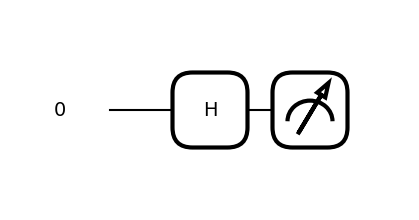

,0,1
0,0.71,0.71
1,0.71,-0.71


In [67]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.Hadamard(0)
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

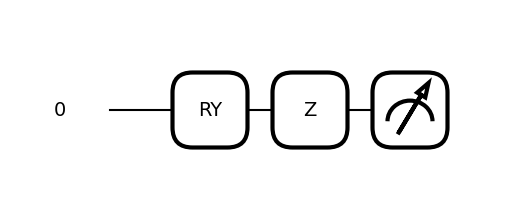

,0,1
0,0.71,0.71
1,0.71,-0.71


In [68]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.RY(-np.pi/2, wires=0)
    qml.PauliZ(0)
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

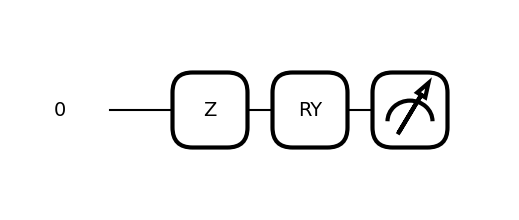

,0,1
0,0.71,0.71
1,0.71,-0.71


In [69]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.PauliZ(0)
    qml.RY(np.pi/2, wires=0)
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

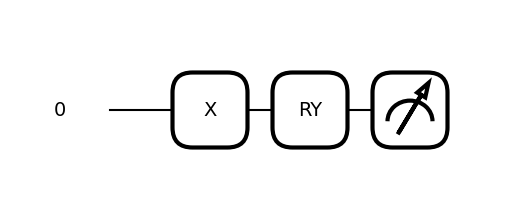

,0,1
0,0.71,0.71
1,0.71,-0.71


In [70]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.PauliX(0)
    qml.RY(-np.pi/2, wires=0)
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

CNOT

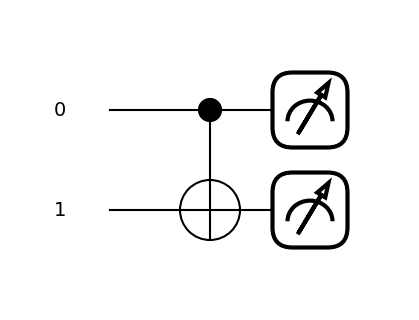

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0


In [71]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.CNOT([0,1]) 
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

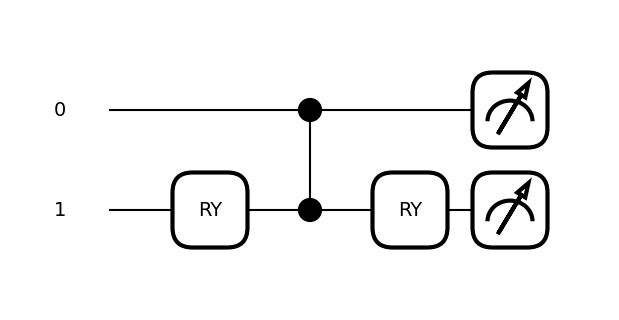

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0


In [72]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.RY(-np.pi/2,wires=1)
    qml.CZ(wires=[0,1])
    qml.RY(np.pi/2,wires=1)
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

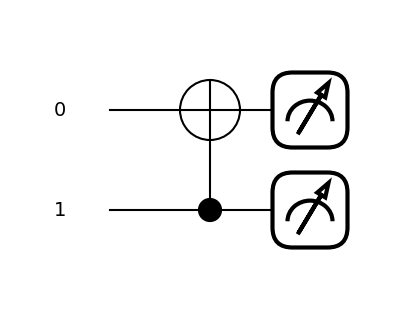

,0,1,2,3
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0


In [79]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.CNOT([1,0]) 
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

Basic rules concerning H and CNOT

In [73]:
def h(wire):
    qml.PauliX(wire)
    qml.RY(-np.pi/2, wires=wire)

def cnot(wires):
    qml.RY(-np.pi/2,wires=wires[1])
    qml.CZ(wires=wires)
    qml.RY(np.pi/2,wires=wires[1])

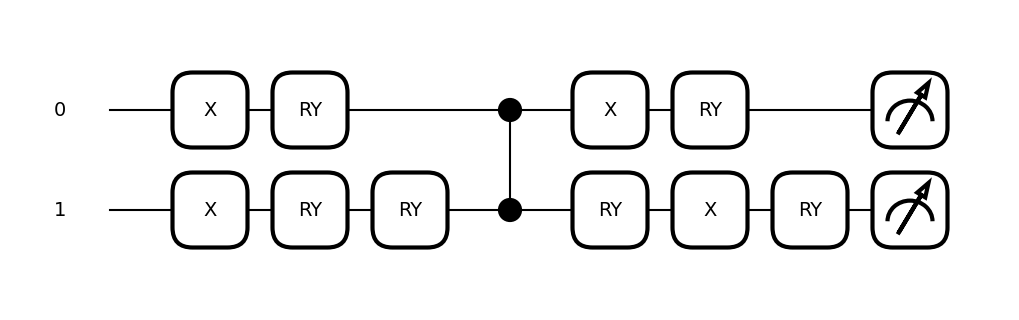

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0


In [77]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(qml.device('default.qubit'))
def circuit():
    h(0)
    h(1)
    cnot([0,1])
    h(0)
    h(1)  
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

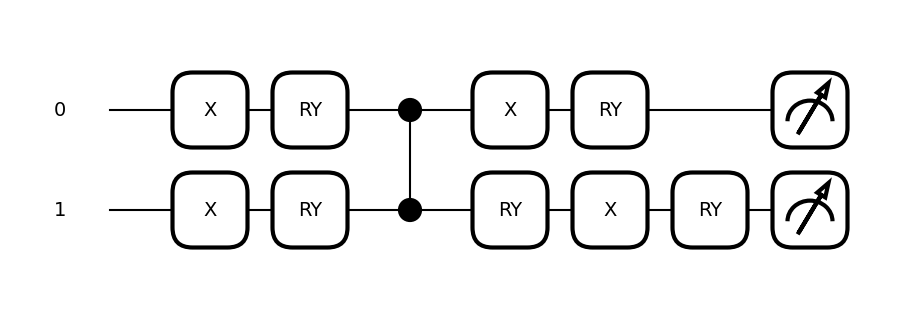

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0


In [78]:
dev = qml.device('default.qubit', wires=2)
@compile
@qml.qnode(qml.device('default.qubit'))
def circuit():
    h(0)
    h(1)
    cnot([0,1])
    h(0)
    h(1)  
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

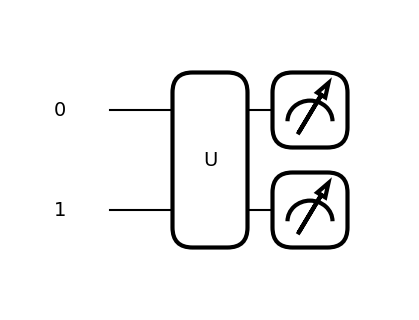

,0,1,2,3
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0


In [80]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.QubitUnitary(u, wires=[0,1])
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\transforms\decompose.py:767: UserWarning: Operator CNOT does not define a decomposition and was not found in the target gate set. To remove this warning, add the operator name (CNOT) or type (<class 'pennylane.ops.op_math.controlled_ops.CNOT'>) to the gate set.
  warnings.warn(


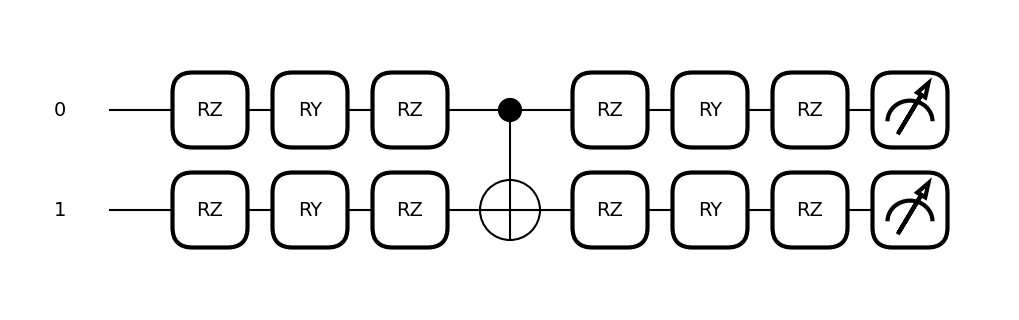

c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\transforms\decompose.py:767: UserWarning: Operator CNOT does not define a decomposition and was not found in the target gate set. To remove this warning, add the operator name (CNOT) or type (<class 'pennylane.ops.op_math.controlled_ops.CNOT'>) to the gate set.
  warnings.warn(


,0,1,2,3
0,1.0,-0.0,0.0,0.0
1,0.0,-0.0,0.0,1.0
2,-0.0,0.0,1.0,-0.0
3,0.0,1.0,-0.0,0.0


In [81]:
dev = qml.device('default.qubit', wires=2)
@partial(decompose, gate_set={qml.CZ, qml.RZ, qml.RY, qml.RX, qml.SX, qml.PauliX})
@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.QubitUnitary(u, wires=[0,1])
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

u = qml.matrix(circuit, wire_order=[0,1])()
u = [[round(num.real, 2) for num in row] for row in u]
pd.DataFrame(u)

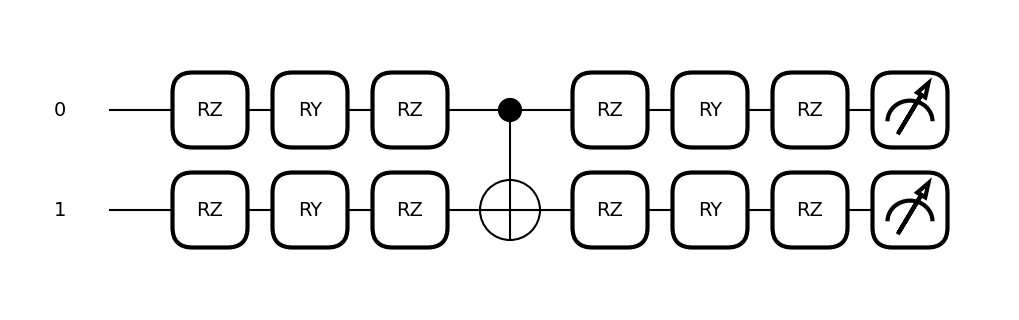

[ 1.00000000e+00+4.53755455e-16j  2.43435060e-32-1.96261557e-16j
 -3.33066907e-16-3.92523115e-16j  1.83697020e-16+3.92523115e-17j]


In [88]:
dev = qml.device('default.qubit', wires=2)
# @compile
@partial(decompose, gate_set={qml.CZ, qml.CNOT, qml.RZ, qml.RY, qml.RX, qml.SX, qml.PauliX})
@qml.qnode(qml.device('default.qubit'))
def circuit():
    qml.QubitUnitary(u, wires=[0,1])
    return qml.state()

qml.draw_mpl(circuit)()
plt.show()

print(circuit())

Qiskit

In [96]:
pd.DataFrame(u)

,0,1,2,3
0,1.0,-0.0,0.0,0.0
1,0.0,-0.0,0.0,1.0
2,-0.0,0.0,1.0,-0.0
3,0.0,1.0,-0.0,0.0


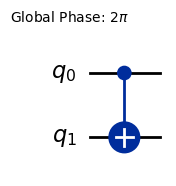

In [107]:
from qiskit.transpiler.passes.synthesis import UnitarySynthesis
from qiskit.transpiler import PassManager
from qiskit import QuantumCircuit

basis = ['cz', 'cx', 'rz', 'sx', 'x']
qc = QuantumCircuit(2)
qc.unitary(u, range(2))
synth_pass = UnitarySynthesis(basis_gates=basis)
pm = PassManager(synth_pass)
optimized_circuit = pm.run(qc)
circuit_drawer(optimized_circuit, output='mpl')  

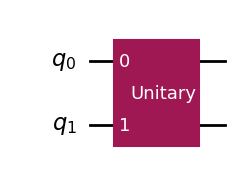

In [108]:
transpiled_circuit = transpile(qc, basis_gates=basis)
circuit_drawer(qc, output='mpl')  

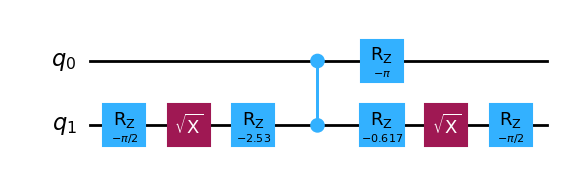

In [109]:
basis = ['cz', 'rz', 'sx', 'x']
qc = QuantumCircuit(2)
qc.unitary(u, range(2))
synth_pass = UnitarySynthesis(basis_gates=basis)
pm = PassManager(synth_pass)
optimized_circuit = pm.run(qc)
circuit_drawer(optimized_circuit, output='mpl')  

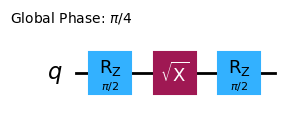

In [115]:
basis = ['cz', 'rz', 'sx', 'x']
qc = QuantumCircuit(1)
qc.h(0)
transpiled_circuit = transpile(qc, basis_gates=basis)
circuit_drawer(transpiled_circuit, output='mpl')  